# **Machine Learning in Python: Performing Principal Component Analysis (PCA)**

Chanin Nantasenamat

<i>Data Professor YouTube channel, http://youtube.com/dataprofessor </i>

In this Jupyter notebook, we will be performing Principal Component Analysis (PCA) using the Iris data set as an example.

---

## **PCA analysis**

### 2.1. Load library

In [2]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd # pandas
import numpy as np

### 2.2. Data scaling

In [3]:
wbAndGender = pd.read_csv("./Static/wbAndGender.csv")

In [4]:
withoutNaNs = wbAndGender.replace("..", np.nan)
for column in withoutNaNs.columns:
    if withoutNaNs.columns.get_loc(column) > 3 and withoutNaNs[column].dtype == 'object':
        withoutNaNs[column] = withoutNaNs[column].astype('float64')

In [5]:
withoutNaNs_filtered = withoutNaNs[withoutNaNs['Year'] == 2015]
withoutNaNs_filtered_notEmpty = withoutNaNs_filtered[withoutNaNs_filtered['Country.Name'].notnull()]
withoutNaNsNumeric = withoutNaNs_filtered_notEmpty.iloc[:,4:38]

### 2.3. Perform PCA analysis

Here we define the number of PC to use as 3

In [6]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean', keep_empty_features=True)
withoutNaNsimputed = imp.fit_transform(withoutNaNsNumeric)

In [7]:
scaled =  StandardScaler().fit_transform(withoutNaNsimputed)
#ss = StandardScaler()
#scaled = pd.DataFrame(ss.fit_transform(withoutNaNsimputed),columns = withoutNaNsimputed.columns)
np.mean(scaled), np.std(scaled)

(-2.2716084006155277e-16, 0.9701425001453319)

In [8]:
pca = decomposition.PCA(n_components=4)
principalComponents_scaled = pca.fit_transform(scaled)


#### 2.4. Compute and retrieve the **scores** values

In [9]:
principal_scaled_Df = pd.DataFrame(data=principalComponents_scaled, columns=['PC1', 'PC2', 'PC3', 'PC4'])

In [10]:
countryYears = withoutNaNs_filtered_notEmpty.iloc[:,1:4]

In [11]:
#df_scores = pd.concat([countryYears, principal_scaled_Df], axis=1)
df_scores = pd.concat([countryYears.reset_index(drop=True), principal_scaled_Df.reset_index(drop=True)], axis=1)

In [12]:
import matplotlib.pyplot as plt 

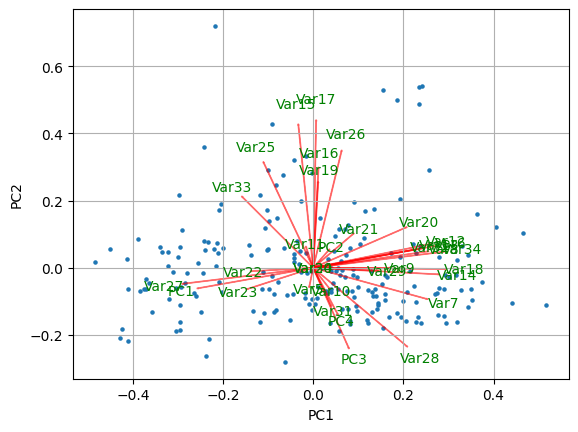

In [13]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            if i < len(labels):  # Check if 'i' is a valid index for 'labels'
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
            else:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(principalComponents_scaled[:,0:2],np.transpose(pca.components_[0:2, :]),list(principal_scaled_Df.columns))
plt.show()


#### 2.5. Retrieve the **loadings** values

In [14]:
loadings = pca.components_.T
column_names = withoutNaNsNumeric.columns.tolist()
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3', 'PC4'], index=column_names)
#df_loadings

#### 2.6. **Explained variance** for each PC

In [15]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.30934535, 0.08546345, 0.06106588, 0.06073264])

## **3. Scree Plot**

### 3.1. Import library

In [16]:
import numpy as np
import plotly.express as px

### 3.2. Preparing explained variance and cumulative variance

#### 3.2.1. Preparing the explained variance data

In [17]:
explained_variance

array([0.30934535, 0.08546345, 0.06106588, 0.06073264])

In [18]:
explained_variance = np.insert(explained_variance, 0, 0)

#### 3.2.2. Preparing the cumulative variance data

In [19]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

#### 3.2.3. Combining the dataframe

In [20]:
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3', 'PC4'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [21]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.309345,0.309
2,PC2,0.085463,0.394
3,PC3,0.061066,0.455
4,PC4,0.060733,0.516


#### 3.2.4. Making the scree plot

##### 3.2.4.1. Explained Variance

In [22]:
# https://plotly.com/python/bar-charts/

fig = px.bar(df_explained_variance, 
             x='PC', y='Explained Variance',
             text='Explained Variance',
             width=800)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

##### 3.2.4.2. Explained Variance + Cumulative Variance

In [23]:
# https://plotly.com/python/creating-and-updating-figures/

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.show()

##### 3.2.4.3. Explained Variance + Cumulative Variance (Separate Plot)

In [24]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ), row=1, col=1
    )

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue"),
    ), row=1, col=2
    )

fig.show()

## **4. Scores Plot**

Source: https://plotly.com/python/3d-scatter-plots/

### 4.1. Load library
[API Documentation](https://plotly.com/python-api-reference/plotly.express.html) for *plotly.express* package

In [25]:
import plotly.express as px

### 4.2. Basic 3D Scatter Plot

In [26]:
fig = px.scatter_3d(df_scores, x='PC1', y='PC2', z='PC3')

fig.show()

### 4.3. Customized 3D Scatter Plot

In [27]:
fig = px.scatter_3d(df_scores, x='PC1', y='PC2', z='PC3',
              color='Country.Name',
              symbol='Country.Name',
              opacity=0.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

# https://plotly.com/python/templates/
#fig.update_layout(template='plotly_white') # "plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"

## **5. Loadings Plot**

In [28]:
loadings_label = df_loadings.index

fig = px.scatter_3d(df_loadings, x='PC1', y='PC2', z='PC3',
                    text = loadings_label)

fig.show()

In [29]:
import plotly.graph_objs as go

# Create the scatter plot
scatter = go.Scatter3d(x=df_loadings['PC1'], y=df_loadings['PC2'], z=df_loadings['PC3'], mode='markers+text',
                       text=df_loadings.index, name='markers', textposition='top center')

# Create arrows
lines = []
line_marker = dict(color='red', width=1)  # adjust as needed

# Create a line (arrow) for each point, from the origin to the point
for i in range(len(df_loadings)):
    lines.append(go.Scatter3d(x=[0, df_loadings['PC1'][i]], 
                              y=[0, df_loadings['PC2'][i]], 
                              z=[0, df_loadings['PC3'][i]], 
                              mode='lines', 
                              line=line_marker))

layout = go.Layout(showlegend=False)

# Add all the arrows to the plot
fig = go.Figure(data=[scatter] + lines, layout=layout)

# Scale size and update axes
fig.update_traces(marker=dict(size=3))  # adjust as needed
fig.update_layout(scene=dict(xaxis=dict(title='PC1'), yaxis=dict(title='PC2'), zaxis=dict(title='PC3')))

fig.show()



---